# Predicting the severity of car accidents

## Introduction

Between the 2004 and 2018 ocurred around 225000 collision in seattle, Canada. During this years a lot of information was registered and organized into a database, that contains about 41 attributes. One of those attributes describes the severity of the collision, that can be labeled from collisions that only caused propierty damage to collisions that caused fatallities. The autorithies of seattle made an effort in order to save a lot of data for each collison. For example, we can know about the number of vehicles and the type of those vehicles involved in the accident, the amount of people involved in the crash, the weather and road conditions,the location of the accidents, and even we can know if the speeding or the influence of some substances took part in the accident. However, there is a lot of missing data that will have to be evaluated towards extracting and analising information from this database.

Having all this information, we can think about the posible benefits of usign data science and machine learning techniques to find the especific conditions that increases the posibility of fatallities in one collison. Having this information we could be able to predict the severity of one accident just by having information about the traffic of the city, the roads and the available information in the database, therefore i expect this to be useful for the ones interested in the collisions, and how we can predict them and more important which conditions that are under our control we can improve to prevent the accidents or at least having the smallest amount of casualties.

This work it's a oportunity to the public entities around the world to have a deeper knowledge of the variables involved in the accidents in order to save lives likewise the insurance companies could be interested in knowing how to reduce the damage in accidents.

## Data Analysis

This notebooks contains the exploratory data analysis of the data used to predict the severity of the collisions in the city of Seattle in Canada. The main objective is to build a highly accurated machine learning model using the available data.The database used was provided by the city if seattle and can be found at: http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0 
The first setep it's to install and import the necessary libraries to make the analysis and ploting of the data:

In [1]:
%%capture
! pip install seaborn
! pip install dexplot

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import io
import requests
from scipy import stats
import datetime
import dexplot as dxp

Then i loaded the data a decoded it:

In [39]:
url="https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [38]:
c.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PEDCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,Block,1,Sideswipe,0,2,Raining,Wet,Dark - Street Lights On
1,Block,1,Parked Car,0,2,Clear,Dry,Daylight
2,Block,0,NaN,0,0,NaN,NaN,NaN
3,Block,0,NaN,0,0,NaN,NaN,NaN
4,Block,0,NaN,0,0,NaN,NaN,NaN


## Data exploration

In this section i chose the variables that i'm going to use to make the prediction, i took the variables that showed a relation with the target, and didn't have a lot of null values.

In [37]:
c.drop(c.columns.difference(['SEVERITYCODE','ADDRTYPE','WEATHER','ROADCOND','LIGHTCOND','VEHCOUNT','COLLISIONTYPE','INCDATE','PEDCOUNT']), 1, inplace=True)
c.head()

,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PEDCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,Block,1,Sideswipe,0,2,Raining,Wet,Dark - Street Lights On
1,Block,1,Parked Car,0,2,Clear,Dry,Daylight
2,Block,0,NaN,0,0,NaN,NaN,NaN
3,Block,0,NaN,0,0,NaN,NaN,NaN
4,Block,0,NaN,0,0,NaN,NaN,NaN


Here i droped the null values in the dataframe and reseted the index

In [15]:
c.isnull().sum()
c.dropna(inplace=True)
c= c.reset_index(drop=True)
c.isnull().sum()

ADDRTYPE         0
SEVERITYCODE     0
COLLISIONTYPE    0
PEDCOUNT         0
VEHCOUNT         0
INCDATE          0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
dtype: int64

I droped the rows with severity unknown, i can't get information from that, also i checked for the quantity of each severity registered

In [16]:
c = c[c.SEVERITYCODE != '0']
c['SEVERITYCODE'].value_counts()

1     131922
2      57553
2b      3045
3        339
Name: SEVERITYCODE, dtype: int64

I took the date data and convert it to a number that indicates the day of the week

In [17]:
c['INCDATE'], c['B'] = c['INCDATE'].str.split(' ', 1).str
c['INCDATE'] =  pd.to_datetime(c['INCDATE']).dt.dayofweek
c.head()

C:\Users\Daniel\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """Entry point for launching an IPython kernel.


,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,PEDCOUNT,VEHCOUNT,INCDATE,WEATHER,ROADCOND,LIGHTCOND,B
0,Block,1,Sideswipe,0,2,2,Raining,Wet,Dark - Street Lights On,00:00:00+00
1,Block,1,Parked Car,0,2,1,Clear,Dry,Daylight,00:00:00+00
2,Block,1,Rear Ended,0,2,3,Clear,Dry,Daylight,00:00:00+00
3,Block,1,Other,0,1,0,Clear,Wet,Daylight,00:00:00+00
4,Intersection,1,Sideswipe,0,2,3,Overcast,Dry,Daylight,00:00:00+00


Then i just counted the number of variables of each row to drop the values of which don't provide clear informartion

In [18]:
print(c['ADDRTYPE'].value_counts())
print(c['WEATHER'].value_counts())
print(c['ROADCOND'].value_counts())
print(c['LIGHTCOND'].value_counts())
print(c['COLLISIONTYPE'].value_counts())
print(c['INCDATE'].value_counts())
c.drop(columns=['B'])
c = c[c.WEATHER != 'Unknown'] 
c = c[c.WEATHER != 'Other'] 
c = c[c.ROADCOND != 'Unknown'] 
c = c[c.ROADCOND != 'Other'] 
c = c[c.LIGHTCOND != 'Unknown'] 
c = c[c.LIGHTCOND != 'Other'] 
c = c[c.LIGHTCOND != 'Dark - Unknown Lighting'] 
c = c[c.LIGHTCOND != 'COLLISIONTYPE']

Block           126239
Intersection     65865
Alley              755
Name: ADDRTYPE, dtype: int64
Clear                       114037
Raining                      33857
Overcast                     28371
Unknown                      14097
Snowing                        908
Other                          818
Fog/Smog/Smoke                 571
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                26
Partly Cloudy                   10
Name: WEATHER, dtype: int64
Dry               127731
Wet                48464
Unknown            14065
Ice                 1215
Snow/Slush          1002
Other                128
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    118697
Dark - Street Lights On      49840
Unknown                      12656
Dusk                          6022
Dawn                          2595
Dark - No Street Lights       1567
Dark - Street Lights Off 

Here i printed each value of the variables grouped with the normalized severity code to visualize the distribution of the data


In [19]:
print(c.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True))
print(c.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True))
print(c.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True))
print(c.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True))
print(c.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True))
print(c.groupby(['INCDATE'])['SEVERITYCODE'].value_counts(normalize=True))

ADDRTYPE      SEVERITYCODE
Alley         1               0.861386
              2               0.130363
              2b              0.008251
Block         1               0.721975
              2               0.263080
              2b              0.013284
              3               0.001661
Intersection  1               0.547603
              2               0.426293
              2b              0.023747
              3               0.002357
Name: SEVERITYCODE, dtype: float64
WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.714286
                          2               0.285714
Clear                     1               0.658696
                          2               0.321397
                          2b              0.017896
                          3               0.002011
Fog/Smog/Smoke            1               0.659459
                          2               0.329730
                          2b              0.005405
           

Then i made a barplot for each variable in comparison to the severity code

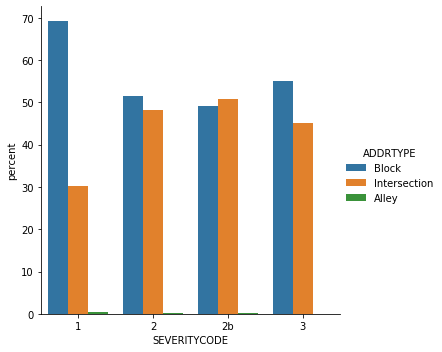

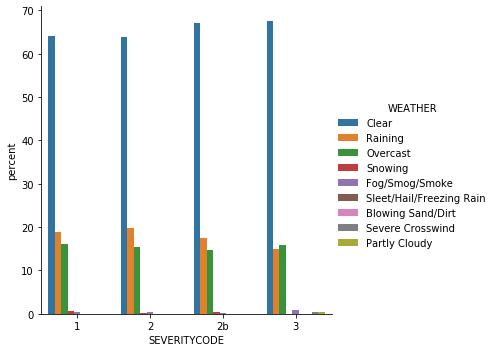

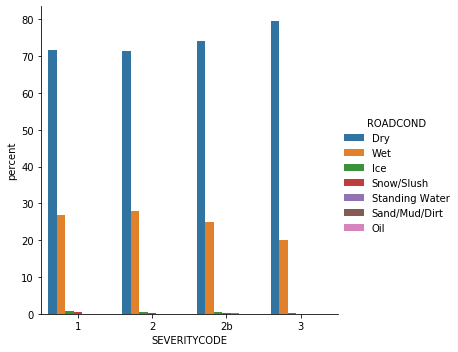

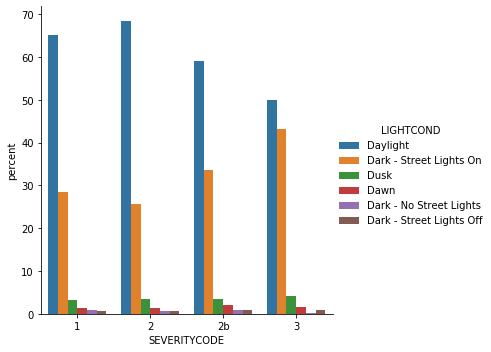

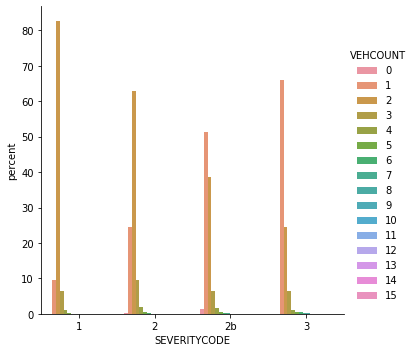

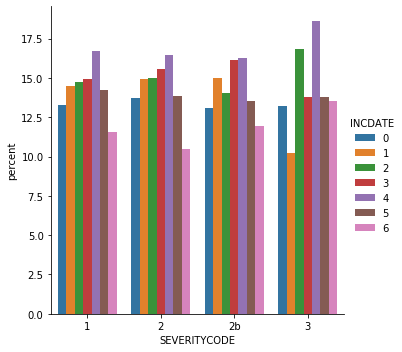

In [27]:
x = 'SEVERITYCODE'
(c.groupby(x)['ADDRTYPE'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='ADDRTYPE',kind='bar'))
(c.groupby(x)['WEATHER'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='WEATHER',kind='bar'))
(c.groupby(x)['ROADCOND'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='ROADCOND',kind='bar'))
(c.groupby(x)['LIGHTCOND'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='LIGHTCOND',kind='bar'))
(c.groupby(x)['VEHCOUNT'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='VEHCOUNT',kind='bar'))
(c.groupby(x)['INCDATE'].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue='INCDATE',kind='bar'))

## Metodology

## Results

## Discussion

## Conclusion